In [1]:
!pip3 install numpy pandas matplotlib seaborn yfinance scipy

In [2]:
#패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
sns.set()

In [3]:
tickers = ['GC=F', 'GLD', 'SI=F', 'TLT', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', '^GSPC']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions=False)['Close']
data = data.resample('3M').last()

[*********************100%***********************]  14 of 14 completed


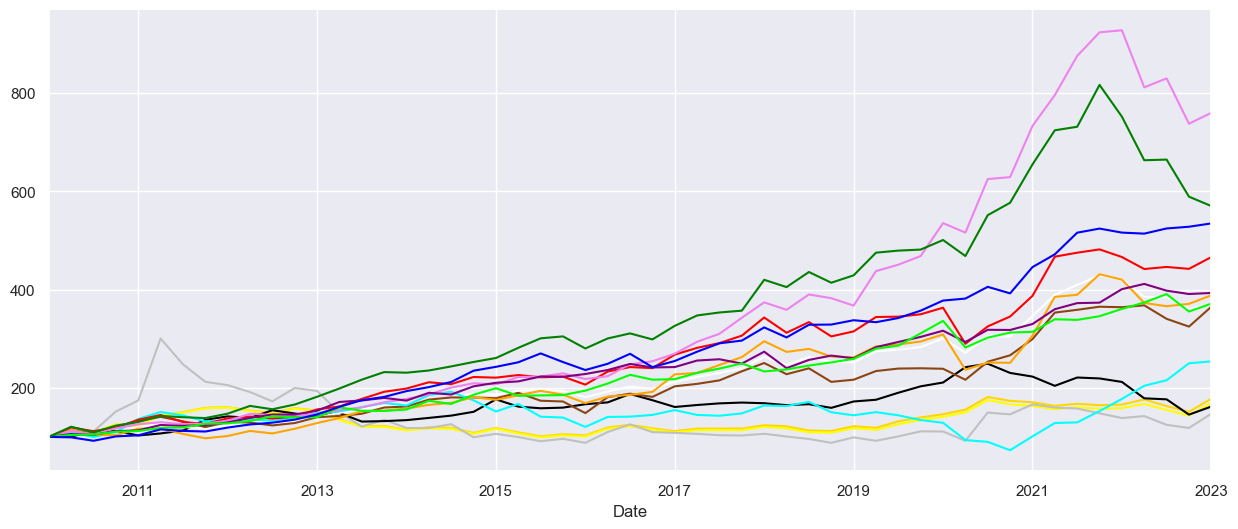

In [4]:
#The idea behind this operation is to compare the behavior of the four different stocks as if they were all starting from the same value = 100
(data / data.iloc[0] * 100)['GC=F'].plot(figsize=(15, 6), color='gold')
(data / data.iloc[0] * 100)['GLD'].plot(figsize=(15, 6), color='yellow')
(data / data.iloc[0] * 100)['SI=F'].plot(figsize=(15, 6), color='silver')
(data / data.iloc[0] * 100)['TLT'].plot(figsize=(15, 6), color='black')
(data / data.iloc[0] * 100)['^GSPC'].plot(figsize=(15, 6), color='white')
(data / data.iloc[0] * 100)['XLB'].plot(figsize=(15, 6), color='saddlebrown')
(data / data.iloc[0] * 100)['XLE'].plot(figsize=(15, 6), color='aqua')
(data / data.iloc[0] * 100)['XLF'].plot(figsize=(15, 6), color='orange')
(data / data.iloc[0] * 100)['XLI'].plot(figsize=(15, 6), color='red')
(data / data.iloc[0] * 100)['XLK'].plot(figsize=(15, 6), color='violet')
(data / data.iloc[0] * 100)['XLP'].plot(figsize=(15, 6), color='purple')
(data / data.iloc[0] * 100)['XLU'].plot(figsize=(15, 6), color='lime')
(data / data.iloc[0] * 100)['XLV'].plot(figsize=(15, 6), color='blue')
(data / data.iloc[0] * 100)['XLY'].plot(figsize=(15, 6), color='green')
plt.show()

#### 참고자료


| Ticker | Sector           |
| ------ | -----            |
|  GC=F  | Gold Feb 23      |
|  GLD   | SPDR Gold Shares |
|  SI=F  | Silver Mar 23    |
|  TLT   | 채권              |
|  XLB   | 소재              |
|  XLE   | 에너지            |
|  XLF   | 금융              |
|  XLI   | 산업재            |
|  XLK   | IT               |
|  XLP   | 필수소비재         |
|  XLU   | 유틸리티           |
|  XLV   | 헬스케어           |
|  XLY   | 임의소비재         |
|  ^GSPC | S&P 500         |




In [5]:
def get_mdd(x):
    """
    MDD(Maximum Draw-Down)
    :return: (peak_upper, peak_lower, mdd rate)
    """
    arr_v = np.array(x)
    peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
    peak_upper = np.argmax(arr_v[:peak_lower])
    return peak_upper, peak_lower, (arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper]


In [6]:
# 포트폴리오 누적 수익률
rets = data.pct_change().fillna(0)
rets = (1 + rets).cumprod() - 1
# print(rets.tail(1))
# type(cum_rets)



# MDD
df = pd.DataFrame({'GC=F':[0, 0, 0],
                  'GLD':[0, 0, 0],
                  'SI=F':[0, 0, 0],
                  'TLT':[0, 0, 0],
                  'XLB':[0, 0, 0],
                  'XLE':[0, 0, 0],
                  'XLF':[0, 0, 0],
                  'XLI':[0, 0, 0],
                  'XLK':[0, 0, 0],
                  'XLP':[0, 0, 0],
                  'XLU':[0, 0, 0],
                  'XLV':[0, 0, 0],
                  'XLY':[0, 0, 0],
                  '^GSPC':[0, 0, 0]},
                  index=['mdd', 'peak_upper', 'peak_lower']
                 )
# print(df)
for sec in tickers.copy() :
    df[sec]['mdd'] = get_mdd(rets[sec])[2]
    df[sec]['peak_upper'] = get_mdd(rets[sec])[0]
    df[sec]['peak_lower'] = get_mdd(rets[sec])[1]
# print(df)

result = pd.concat([rets.tail(1), df])
result

/var/folders/_1/d_xj3zfn13sg9mkg93qfj5740000gn/T/ipykernel_36134/3913591867.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sec]['mdd'] = get_mdd(rets[sec])[2]


,GC=F,GLD,SI=F,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,^GSPC
2023-01-31 00:00:00-05:00,0.778763,0.692054,0.472533,0.617732,2.649892,1.537462,2.882458,3.660385,6.597497,2.930292,2.712710,4.346193,4.699460,2.699340
mdd,-0.981826,-1.016259,-1.060307,-0.695719,-0.161760,-1.296033,-0.344449,-0.279097,-0.229832,-0.193227,-0.229981,-0.199017,-0.344158,-0.207673
peak_upper,8.000000,8.000000,5.000000,42.000000,49.000000,18.000000,40.000000,40.000000,48.000000,32.000000,40.000000,22.000000,47.000000,47.000000
peak_lower,22.000000,22.000000,24.000000,51.000000,51.000000,43.000000,41.000000,41.000000,51.000000,33.000000,41.000000,24.000000,52.000000,51.000000


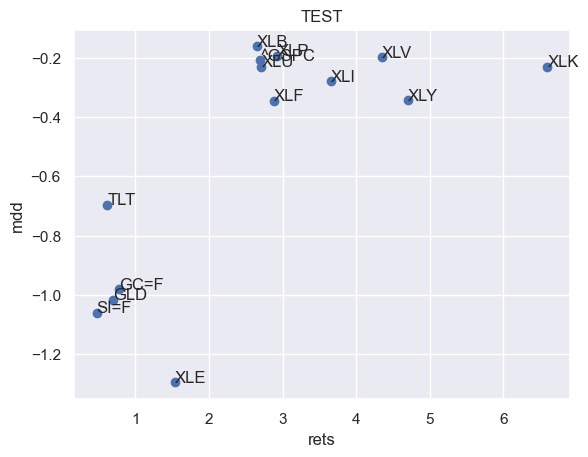

In [7]:
# 그래프 결과
plt.scatter(result[:1], result[1:2])
for sec in tickers :
    plt.text(result[sec][:1], result[sec][1:2], sec)
plt.title('TEST')
plt.xlabel('rets')
plt.ylabel('mdd')
plt.show()

#### 권순범 포트폴리오 구성
#### 위에서 살펴본 mdd, 수익률을 보고 결정


| Ticker | Sector  | percentage |
| ------ | -----   | ------     |
|  XLK   | IT      | 40%        |
|  XLV   | 헬스케어  | 40%        |
| ^GSPC  | S&P 500 | 20%        |

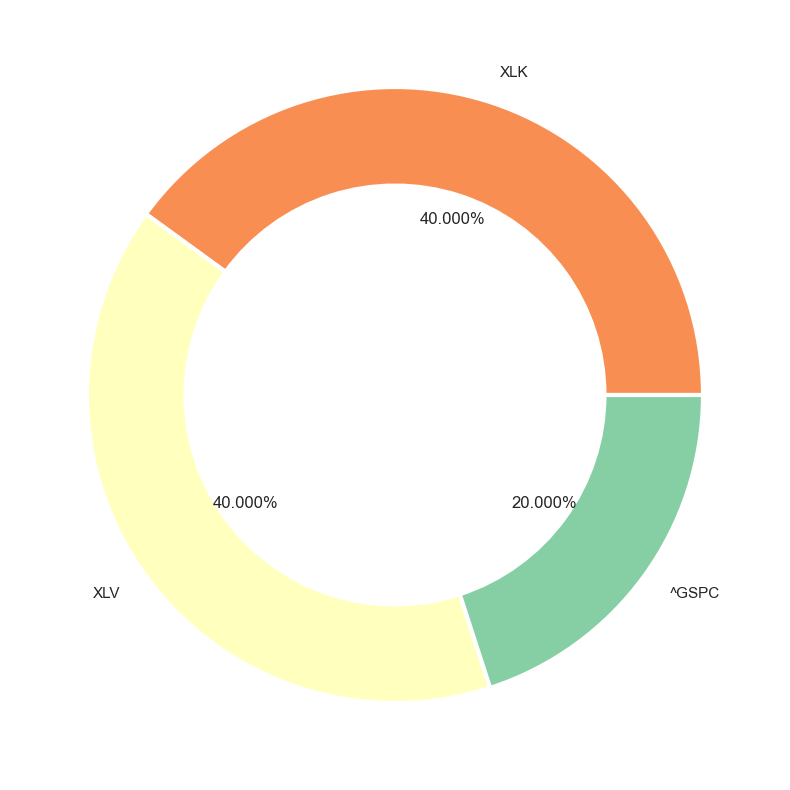

In [10]:
# 포트폴리오
tickers = ['XLK', 'XLV', '^GSPC']

# 파이차트 시각화
pal = sns.color_palette('Spectral',len(tickers))
plt.figure(figsize=(10, 10))
wedgeprops = {'width': 0.32, 'edgecolor': 'w', 'linewidth': 3}
weights = np.array([0.4, 0.4, 0.2])
plt.pie(weights, labels=tickers, autopct='%.3f%%', wedgeprops=wedgeprops, colors=pal)
plt.show()

[*********************100%***********************]  3 of 3 completed


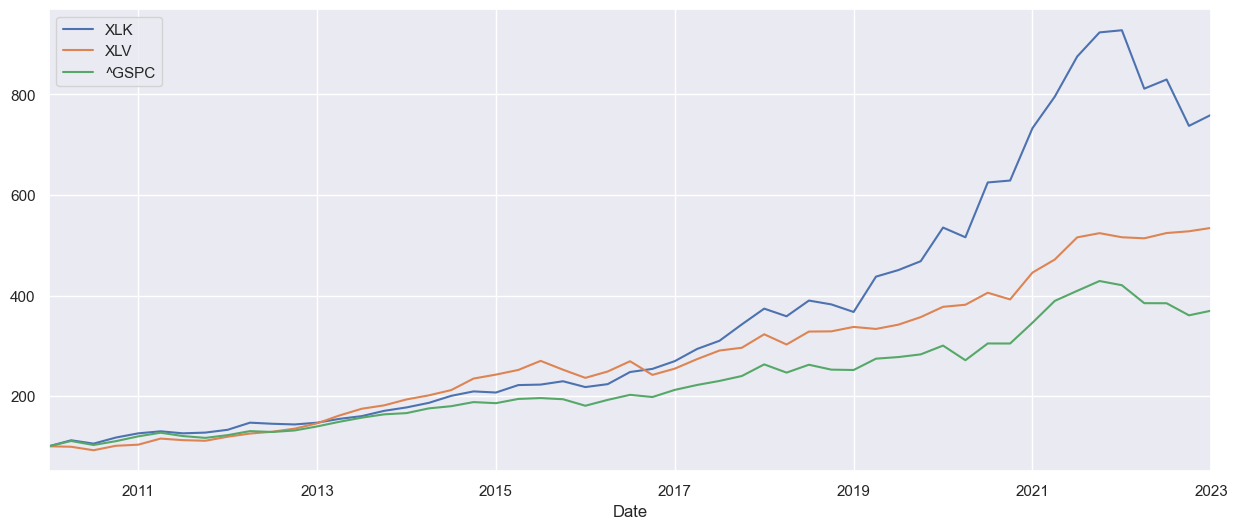

In [11]:
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions=False)['Close']
data = data.resample('3M').last()

(data / data.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

In [12]:
def get_weights(rets):
  weights = np.array([0.4,0.4,0.2])
  time_series_weights = np.ones_like(rets) * weights
  return time_series_weights

#수익률 계산
rets = data.pct_change().fillna(0)
weights = get_weights(rets)[-1]

# 시계열 가중치 데이터프레임
awp_w_df = pd.DataFrame(get_weights(rets), index=rets.index, columns=rets.columns)

# 포트폴리오 수익률
port_rets = awp_w_df.shift() * rets
port_rets.dropna(axis=0, how='any', inplace=True)

# 포트폴리오 누적 수익률
port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1

총 수익률: 484.22%
최대 수익률 낙폭: 543.27% -> 471.43%
MDD: -13.22%


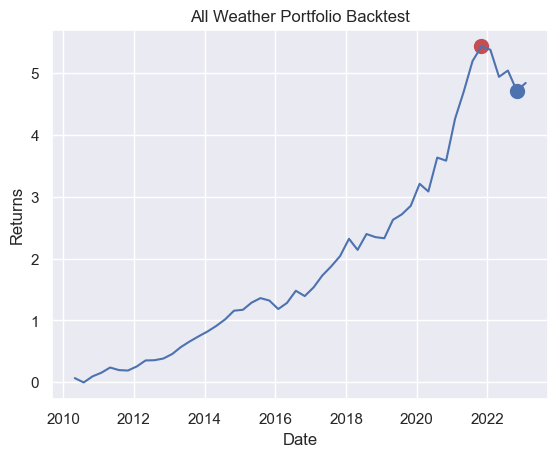

In [28]:
# 그래프 결과
plt.plot(port_cum_rets)
plt.title('All Weather Portfolio Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')

# MDD 표시
upper = port_cum_rets.index[get_mdd(port_cum_rets)[0]]
lower = port_cum_rets.index[get_mdd(port_cum_rets)[1]]
plt.scatter(upper, port_cum_rets[upper], s = 100, c = 'r')
plt.scatter(lower, port_cum_rets[lower], s = 100, c = 'b')

print('총 수익률: ' + str(round(port_cum_rets[-1] * 100, 2)) + '%')
print('최대 수익률 낙폭: ' + '\033[95m' + str(round(port_cum_rets[upper] * 100, 2)) + '%' + ' -> ' + '\033[96m' + str(round(port_cum_rets[lower] * 100, 2)) + '%')
print('MDD: ' + str(round(get_mdd(port_cum_rets)[2] * 100, 2)) + '%')